<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning
*26 de Octubre de 2024*

#### Integrantes: 
` Gabriel Álvarez, Giuseppe Lavarello, Ingrid Solís, Rosario Valderrama `

## 1. Objetivo

El objetivo de este informe es realizar un análisis del conjunto de datos de **Indicadores de Salud de Diabetes** del **CDC** para:

1. Determinar los factores que contribuyen principalmente al diagnóstico de diabetes.

2. Aplicar modelo de NNet feedFordward que permita predecir el diagnóstico (clasiicación) de diabetes.


## 2. Introducción
<div style="text-align: justify;">
La diabetes es una de las principales preocupaciones de salud a nivel mundial, afectando a millones de personas y contribuyendo significativamente a la mortalidad global. Esta enfermedad crónica ocurre cuando el cuerpo no produce suficiente insulina o no puede utilizarla de manera eficiente, lo que resulta en niveles elevados de glucosa en sangre. Si no se trata adecuadamente, la diabetes puede llevar a complicaciones graves, como enfermedades cardíacas, accidentes cerebrovasculares, insuficiencia renal, entre otras.
<br><br>  
El objetivo de este informe es analizar este conjunto de datos para identificar patrones o relaciones entre las variables que puedan predecir el diagnóstico de diabetes. Para ello, se aplicarán tanto modelos de aprendizaje no supervisado como supervisado.
</div>

## 3. Metodología

La metodología a utilizar seguirá una estructura general de varias etapas que incluyen la preparación de los datos, el análisis exploratorio, el desarrollo de modelos y la evaluación de resultados.

1. **Preparación de los Datos**

2. **Análisis Exploratorio de Datos (EDA)**

3. **Limpieza de Datos**

4. **Desarrollo de Modelo**:
   
5. **Evaluación de Resultados**:

Métricas de Evaluación

Interpretación de Resultados

6. **Conclusiones y Recomendaciones**

### 3.1  Preparación de los Datos
#### 3.1.1  Importe de paquetes

In [29]:
# %pip install ucimlrepo
# %pip install xgboost
# %pip install --upgrade scikit-learn
# %pip install --upgrade imbalanced-learn
# %pip install hyperopt
# %pip install missingno
# %pip install tensorflow

In [30]:
# Importar paquetes
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo 
import missingno as msng

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

import math
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
import tensorflow as tf
from tqdm import tqdm


from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import ADASYN

from xgboost import XGBClassifier
from hyperopt import fmin, tpe, hp, STATUS_OK

# setear opciones
sns.set_theme()
pd.set_option('display.max_columns', None)

#### 3.1.2  Carga de Datos

In [31]:
# Buscar dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (como pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata (revisar markdown)
# print(cdc_diabetes_health_indicators.metadata) 
  
# informacion de variables 
print(cdc_diabetes_health_indicators.variables) 

                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

##### Información de Variables


| **Nombre de Variable**     | **Rol**    | **Tipo**   | **Descripción**                                                          | **Unidades**       | **Valores Faltantes** |
|----------------------------|------------|------------|-------------------------------------------------------------------------|---------------------|---------------------|
| ID                         | ID         | Integer   | ID del paciente                                                                |                     | no                  |
| Diabetes_binary            | Target     | Binary    | 0 = sin diabetes, 1 = prediabetes o diabetes                                 |                     | no                  |
| HighBP                     | Feature    | Binary    | 0 = sin presión arterial alta, 1 = presión arterial alta                      |                     | no                  |
| HighChol                   | Feature    | Binary    | 0 = sin colesterol alto, 1 = colesterol alto                                   |                     | no                  |
| CholCheck                  | Feature    | Binary    | 0 = sin chequeo de colesterol en 5 años, 1 = sí chequeo de colesterol en 5 años |                     | no                  |
| BMI                        | Feature    | Integer   | Índice de Masa Corporal                                                         |                     | no                  |
| Smoker                     | Feature    | Binary    | 0 = no, 1 = sí (ha fumado al menos 100 cigarrillos en su vida)              |                     | no                  |
| Fruits                     | Feature    | Binary    | 0 = no, 1 = sí (consume fruta 1 o más veces al día)                          |                     | no                  |
| Veggies                    | Feature    | Binary    | 0 = no, 1 = sí (consume verduras 1 o más veces al día)                       |                     | no                  |
| HvyAlcoholConsump          | Feature    | Binary    | 0 = no, 1 = sí (consumo excesivo de alcohol)                                 |                     | no                  |
| AnyHealthcare              | Feature    | Binary    | 0 = no, 1 = sí (tiene algún tipo de cobertura de salud)                      |                     | no                  |
| NoDocbcCost               | Feature    | Binary    | 0 = no, 1 = sí (necesitó ver a un médico pero no pudo debido a costos)      |                     | no                  |
| GenHlth                   | Feature    | Integer   | Escala de salud general 1-5 (1 = excelente, 5 = mala)                        |                     | no                  |
| MentHlth                  | Feature    | Integer   | Días de mala salud mental en los últimos 30 días (escala 1-30)               | días                | no                  |
| PhysHlth                  | Feature    | Integer   | Días de mala salud física en los últimos 30 días (escala 1-30)               | días                | no                  |
| DiffWalk                   | Feature    | Binary    | 0 = no, 1 = sí (dificultad seria para caminar o subir escaleras)            |                     | no                  |
| Sex                        | Feature    | Binary    | 0 = mujer, 1 = hombre                                                          |                     | no                  |
| Stroke                     | Feature    | Binary    | 0 = no, 1 = sí (alguna vez le dijeron que tuvo un accidente cerebrovascular) |                     | no                  |
| HeartDiseaseorAttack       | Feature    | Binary    | 0 = no, 1 = sí (enfermedad cardíaca coronaria o infarto de miocardio)       |                     | no                  |
| PhysActivity               | Feature    | Binary    | 0 = no, 1 = sí (actividad física en los últimos 30 días, excluyendo el trabajo) |                     | no                  |

##### Dataset Metadata
| **Attribute**                    | **Value**                                                                                                                                                                                                                                                                                     |
|-----------------------------------|----------------------------------------------------------|
| **uci_id**                        | 891                                                                                                                                                                                                                                                                                           |
| **name**                          | CDC Diabetes Health Indicators                                                                                                                                                                                                                                                                 |
| **repository_url**                | [UCI Repository Link](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)                                                                                                                                                                                                  |
| **data_url**                      | [Data Link](https://archive.ics.uci.edu/static/public/891/data.csv)                                                                                                                                                                                                                            |
| **abstract**                      | The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. |
| **area**                          | Health and Medicine                                                                                                                                                                                                                                                                           |
| **tasks**                         | Classification                                                                                                                                                                                                                                                                                |
| **characteristics**               | Tabular, Multivariate                                                                                                                                                                                                                                                                         |
| **num_instances**                 | 253680                                                                                                                                                                                                                                                                                        |
| **num_features**                  | 21                                                                                                                                                                                                                                                                                            |
| **feature_types**                 | Categorical, Integer                                                                                                                                                                                                                                                                          |
| **demographics**                  | Sex, Age, Education Level, Income                                                                                                                                                                                                                                                             |
| **target_col**                    | Diabetes_binary                                                                                                                                                                                                                                                                               |
| **index_col**                     | ID                                                                                                                                                                                                                                                                                            |
| **has_missing_values**            | no                                                                                                                                                                                                                                                                                            |
| **missing_values_symbol**         | None                                                                                                                                                                                                                                                                                          |
| **year_of_dataset_creation**      | 2017                                                                                                                                                                                                                                                                                          |
| **last_updated**                  | Fri Nov 03 2023                                                                                                                                                                                                                                                                               |
| **dataset_doi**                   | 10.24432/C53919                                                                                                                                                                                                                                                                               |
| **intro_paper ID**                | 308                                                                                                                                                                                                                                                                                           |
| **intro_paper type**              | NATIVE                                                                                                                                                                                                                                                                                        |
| **intro_paper title**             | Incidence of End-Stage Renal Disease Attributed to Diabetes Among Persons with Diagnosed Diabetes — United States and Puerto Rico, 2000–2014                                                                                                                                                   |
| **intro_paper authors**           | Nilka Rios Burrows, MPH; Israel Hora, PhD; Linda S. Geiss, MA; Edward W. Gregg, PhD; Ann Albright, PhD                                                                                                                                                                                         |
| **intro_paper venue**             | Morbidity and Mortality Weekly Report                                                                                                                                                                                                                                                          |
| **intro_paper year**              | 2017                                                                                                                                                                                                                                                                                          |
| **intro_paper URL**               | [Paper Link](https://www.cdc.gov/mmwr/volumes/66/wr/mm6643a2.htm)                                                                                                                                                                                                                             |
| **additional_info summary**       | Dataset link: https://www.cdc.gov/brfss/annual_data/annual_2014.html                                                                                                                                                                                                                           |
| **additional_info purpose**       | To better understand the relationship between lifestyle and diabetes in the US                                                                                                                                                                                                                 |
| **additional_info funded_by**     | The CDC                                                                                                                                                                                                                                                                                       |
| **instances_represent**           | Each row represents a person participating in this study.                                                                                                                                                                                                                                     |
| **recommended_data_splits**       | Cross validation or a fixed train-test split could be used.                                                                                                                                                                                                                                   |
| **sensitive_data**                | - Gender<br/>- Income<br/>- Education level                                                                                                                                                                                                                                                   |
| **preprocessing_description**     | Bucketing of age                                                                                                                                                                                                                                                                              |
| **variable_info**                 | - Diabetes diagnosis<br/>- Demographics (race, sex)<br/>- Personal information (income, educations)<br/>- Health history (drinking, smoking, mental health, physical health)                                                                                                                   |
| **external_url**                  | [Kaggle Dataset Link](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)                                                                                                                                                                                          |


In [32]:
df0=pd.concat([y,X], axis=1)

### 3.2 Análisis Exploratorio

In [33]:
# Mostrar las primeras 10 filas de los datos
df0.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,1,0,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,0,0,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,1,0,1,0,3,0,0,1,0,11,4,4
8,1,1,1,1,30,1,0,1,0,1,1,0,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,1,0,1,0,2,0,0,0,1,8,4,3


El dataset cuenta con 253.680 entradas y con 22 columnas. No existen valores NaN presentes.

In [34]:
# Mostrar el tamaño del DataFrame
df0.shape

(253680, 22)

In [35]:
# Recopilación de información básica sobre el conjunto de datos
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [36]:
# Notar que estan todas las Features consideradas como Int. Se cambia a Bool donde corresponda

binary_features = {
    "Diabetes_binary": bool,
    "HighBP": bool,
    "HighChol": bool,
    "CholCheck": bool,
    "Smoker": bool,
    "Stroke": bool,
    "HeartDiseaseorAttack": bool,
    "PhysActivity": bool,
    "Fruits": bool,
    "Veggies": bool,
    "HvyAlcoholConsump": bool,
    "AnyHealthcare": bool,
    "NoDocbcCost": bool,
    "DiffWalk": bool,
    "Sex": bool,
}
df0 = df0.astype(binary_features)

In [37]:
# Recopilación de estadísticas descriptivas sobre los datos
df0.describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


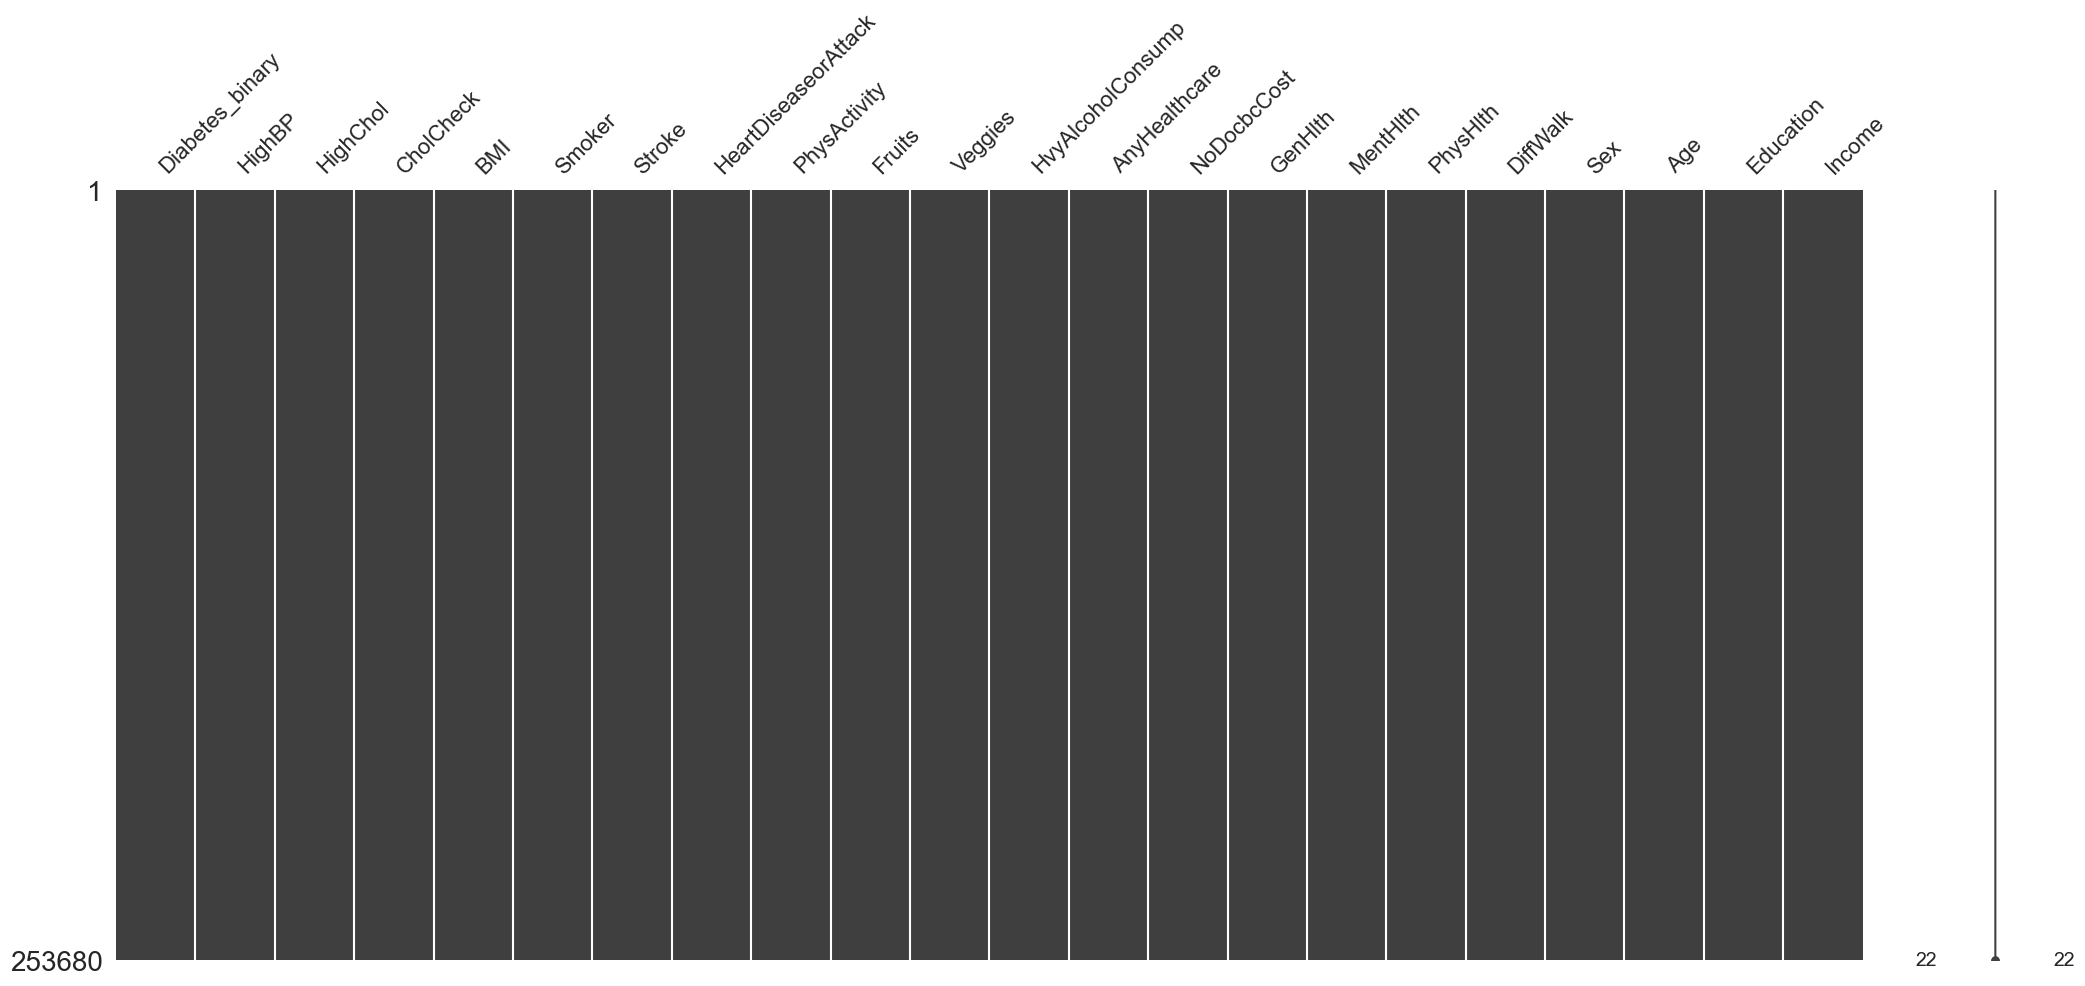

In [38]:
# Chequeo visual de Nans
msng.matrix(df0)
plt.show()

### 3.3 Limpieza de Datos

Se verifica cantidad de datos que se encuentren duplicados en el dataset. Podemos ver la existencia de 24.206.

In [39]:
# Chequeo por duplicados
duplicados = df0.duplicated().sum()

# Porcentaje de duplicados
porcentage = df0.duplicated().sum() / X.shape[0] * 100

print(f'{duplicados} filas contienen duplicados, lo que representa el {porcentage.round(2)}% del total de los datos.')


24206 filas contienen duplicados, lo que representa el 9.54% del total de los datos.


In [40]:
df1=df0 # Originalmente se eliminaron los duplicados aqui, pero se elimino ese paso por el desbalance de clases

Creamos un boxplot y un violin plot para visualizar la distribución de todas las variables numéricas para df1 y así poder ver posibles outliers.

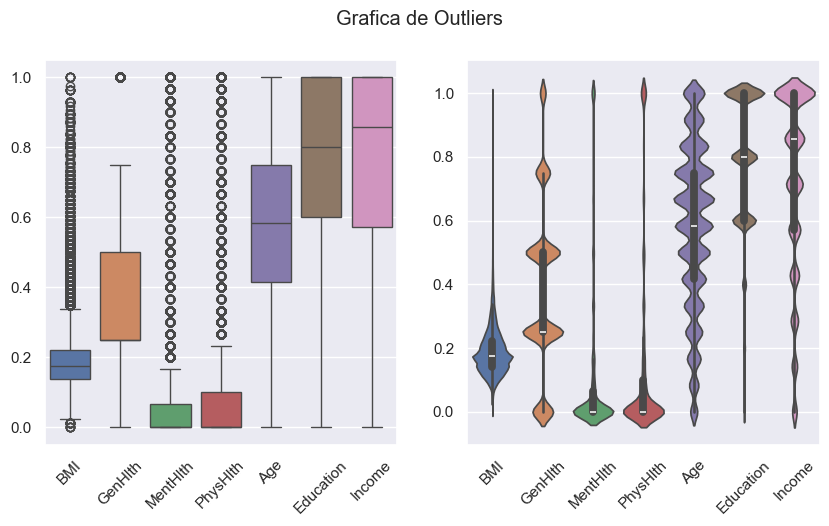

In [41]:
# Crear un boxplot para visualizar la distribución de todas las variables numéricas y detectar posibles valores atípicos
fig, axs= plt.subplots(1, 2, figsize=(10,5))
# seleccionar columnas numéricas
num_columns = df1.select_dtypes(include=['number'])

# normalizar los valores usando escalado Min-Max
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Crear un dataframe con los datos normalizados
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)
sns.boxplot(data= df_normalized, ax=axs[0])
sns.violinplot(data= df_normalized, ax=axs[1])

axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)

fig.suptitle('Grafica de Outliers')
plt.show()


`Boxplot:`

**BMI:** La mediana se encuentra cerca de 0.2, con un rango intercuartílico (IQR) que indica una distribución concentrada en valores bajos, y se observa una gran cantidad de outliers distribuidos por encima de 0.4. Esto sugiere que hay individuos con valores de BMI mucho más altos que el promedio.

**GenHlth:** La mediana está alrededor de 0.4, y hay una dispersión notable en la mitad inferior, con algunos outliers por encima de 0.6, indicando una salud general algo diversa en esta muestra.

**MentHlth:** Esta variable tiene una mediana muy baja, cerca de 0, y una gran cantidad de outliers por encima de 0.2, lo que indica que la mayoría de los valores están cerca de cero, pero existen algunos individuos con niveles más altos.

**PhysHlth:** Similar a MentHlth, la mediana está en valores bajos, y la variable tiene muchos outliers, lo que podría indicar problemas físicos ocasionales en una minoría de la muestra.

**Age:** La mediana está cerca de 0.6, con una dispersión más uniforme y un rango amplio, cubriendo casi todo el espectro. No hay muchos outliers, lo que sugiere que esta variable tiene una variabilidad natural mayor.

**Education e Income:** Ambas variables tienen medianas en valores altos, cerca de 0.8 y 0.9, respectivamente, con poca variabilidad. Los datos están concentrados en el extremo superior, sin outliers, lo cual indica que la mayoría de los individuos tienen altos niveles de educación e ingresos.



`Violin Plot:`

**BMI:** Muestra una distribución en forma de campana con mayor densidad en valores bajos (cerca de 0.2), aunque también existen algunos valores en la mitad superior, lo que confirma la presencia de outliers.

**GenHlth:** Presenta una distribución bimodal con picos alrededor de 0.4 y 0.6, sugiriendo que hay dos subgrupos en términos de salud general.

**MentHlth:** La mayoría de los datos están concentrados cerca de 0, pero hay una pequeña distribución en valores superiores, indicando que solo un pequeño grupo reporta problemas significativos de salud mental.

**PhysHlth:** Similar a MentHlth, los valores se concentran cerca de 0, con algunos datos dispersos en valores más altos, lo que refleja una situación similar para la salud física.

**Age:** Tiene una distribución simétrica y alargada, con una densidad uniforme en el centro del rango, lo que sugiere una mayor variedad de edades.

**Education e Income:** Ambas tienen distribuciones muy estrechas, con la mayoría de los datos en valores altos, lo que indica que la muestra está compuesta principalmente por personas con niveles altos en estas variables.


Los gráficos muestran que, antes del tratamiento de outliers, observamos que BMI, MentHlth, y PhysHlth tienen muchos valores extremos, lo que sugiere gran variabilidad en estas variables, mientras que Education e Income están concentradas en valores altos, con poca variabilidad.

In [42]:
# Bucle para recorrer cada columna numérica y detectar y contar valores atípicos
out_cols=['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']
lims = {}
for column in out_cols:
    print(f"Procesando columna: {column}")
    
    # Calcular el valor del percentil 25
    percentil25 = df1[column].quantile(0.25)
    
    # Calcular el valor del percentil 75
    percentil75 = df1[column].quantile(0.75)
    
    # Calcular el rango intercuartil (IQR)
    iqr = percentil75 - percentil25
    
    # Definir los límites superior e inferior para los valores no atípicos
    limite_superior = percentil75 + 1.5 * iqr
    limite_inferior = percentil25 - 1.5 * iqr
    lims[column] = [limite_superior,limite_inferior]
    
    print(f"Límite inferior para {column}:", limite_inferior)
    print(f"Límite superior para {column}:", limite_superior)
    
    # Identificar los valores atípicos en la columna actual
    valores_atípicos = df1[(df1[column] > limite_superior) | (df1[column] < limite_inferior)]
    
    # Contar el número de filas con valores atípicos
    print(f"Número de filas que contienen valores atípicos en {column}: {len(valores_atípicos)}\n")


Procesando columna: BMI
Límite inferior para BMI: 13.5
Límite superior para BMI: 41.5
Número de filas que contienen valores atípicos en BMI: 9847

Procesando columna: GenHlth
Límite inferior para GenHlth: 0.5
Límite superior para GenHlth: 4.5
Número de filas que contienen valores atípicos en GenHlth: 12081

Procesando columna: MentHlth
Límite inferior para MentHlth: -3.0
Límite superior para MentHlth: 5.0
Número de filas que contienen valores atípicos en MentHlth: 36208

Procesando columna: PhysHlth
Límite inferior para PhysHlth: -4.5
Límite superior para PhysHlth: 7.5
Número de filas que contienen valores atípicos en PhysHlth: 40949



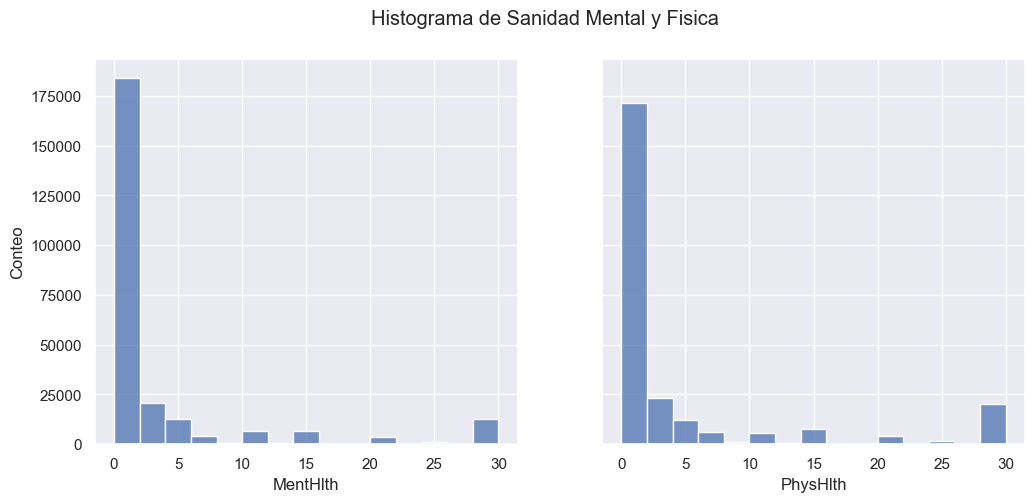

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(12,5),sharey=True)
sns.histplot(data=df1, x='MentHlth',ax=axs[0], binwidth=2)
sns.histplot(data=df1, x='PhysHlth',ax=axs[1], binwidth=2)

axs[0].set_ylabel('Conteo')
fig.suptitle('Histograma de Sanidad Mental y Fisica')

plt.show()

**Decisión** Dado que la mayoría de los individuos parecen estar sanos (con pocos reportes de días con problemas de salud), estas columnas pueden no aportar suficiente información relevante para la predicción del diagnóstico de diabetes que es una enfermedad cronica.

In [44]:
# Usar una máscara booleana para eliminar valores atípicos
mask = True
for column, lim in lims.items():
    if column == 'GenHlth': continue
    mask &= ((df1[column] <= lim[0]) & (df1[column] >= lim[1]))
df2 = df1[mask].copy()

In [45]:
df2.drop(columns=['PhysHlth','MentHlth'], inplace=True)

Para df1 se eliminan los valores atípicos y se crea df2.

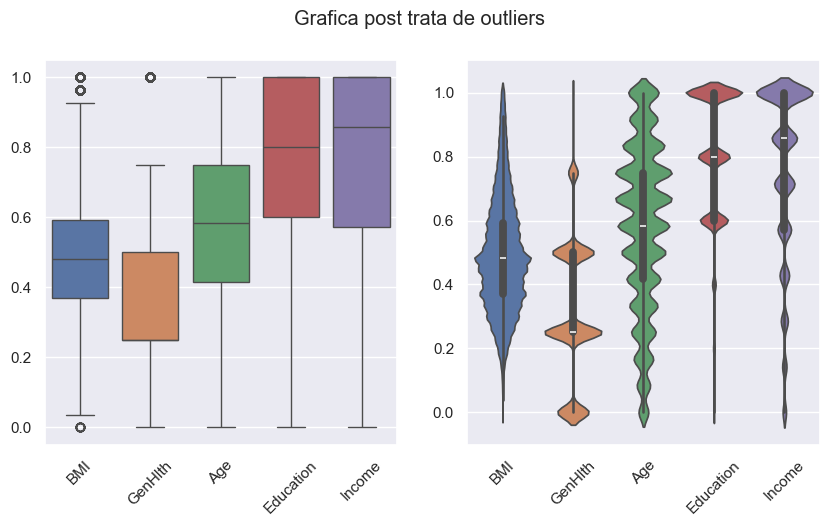

In [46]:
# Crear un boxplot para visualizar la distribución de todas las variables numéricas y detectar posibles valores atípicos
fig, axs= plt.subplots(1, 2, figsize=(10,5))
# seleccionar columnas numéricas
num_columns = df2.select_dtypes(include=['number'])

# normalizar los valores usando escalado Min-Max
scaler = MinMaxScaler()
normalized_data2 = scaler.fit_transform(num_columns)

# Crear un dataframe con los datos normalizados
df_normalized2 = pd.DataFrame(normalized_data2, columns=num_columns.columns)
sns.boxplot(data= df_normalized2, ax=axs[0])
sns.violinplot(data= df_normalized2, ax=axs[1])

axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)

fig.suptitle('Grafica post trata de outliers')
plt.show()

Se vuelven a crear boxplot y violin plot para comparar la distribución de varias variables después del tratamiento de outliers. Las variables presentadas son BMI (Índice de Masa Corporal), GenHlth (Salud General), Age (Edad), Education (Educación) y Income (Ingresos).

`Boxplot.`

**BMI:** La mediana se encuentra alrededor de 0.4, y el rango intercuartílico (IQR) muestra una distribución concentrada en la mitad inferior del rango, con algunos outliers por encima de 0.8.

**GenHlth:** Tiene una mediana alrededor de 0.5, y una dispersión notable en la mitad inferior. Se observan algunos outliers por encima de 1.0, lo que indica individuos con una salud general más alta que el promedio.

**Age:** La distribución es bastante uniforme, con la mediana cerca de 0.6. No se observan outliers, y el rango es más amplio, cubriendo gran parte del espectro.

**Education:** La mediana está en 0.8, lo que indica que la mayoría de los datos están en el rango superior de educación. La caja es más estrecha, mostrando una menor variabilidad, y no hay outliers notables.

**Income:** Similar a Education, con una mediana cerca de 0.9 y una caja aún más compacta, sugiriendo una concentración de ingresos altos. No hay outliers visibles.



`Violin Plot.`

**BMI:** La distribución tiene forma de campana, con mayor densidad en valores entre 0.3 y 0.5, sugiriendo que la mayoría de las personas tienen un BMI en este rango.

**GenHlth:** Presenta una distribución algo bimodal con una mayor concentración alrededor de 0.5 y otra ligera concentración alrededor de 0.8, lo cual sugiere que la salud general varía, con subgrupos en niveles específicos.

**Age:** Tiene una distribución simétrica y alargada, indicando una amplia variedad en la edad de los individuos, con un pico de densidad alrededor de 0.6.

**Education:** La distribución es mayormente uniforme, con un pico alrededor de 0.8, indicando una alta concentración en niveles educativos más altos.

**Income:** Muy concentrado en el extremo superior (cerca de 1.0), lo que sugiere que la mayoría de los individuos tienen ingresos elevados, reflejando una menor diversidad en esta variable.


Los gráficos muestran que, después del tratamiento de outliers, variables como Education e Income se encuentran concentradas en valores altos (0.8-1.0), mientras que BMI y GenHlth muestran más variabilidad y presencia de valores atípicos. La variable Age tiene una distribución más amplia, cubriendo la mayoría del rango sin valores atípicos. Esto da una idea clara de cómo se distribuyen las características en la población después de limpiar los valores extremos.

### 4 Desarrollo de Modelos

#### REDES NEURONALES

Se busca entrenar y testear modelos de redes neuronales para predecir si una persona tiene diabetes:

a) Preparación de los datos:
Se procesan las variables independientes (X) y dependientes (y).
Se dividen los datos en conjuntos de entrenamiento y prueba.


b) Normalización:
Se escalan las características (X) para que todas tengan valores en un rango similar.

c) Red neuronal:
Se crea un modelo secuencial de redes neuronales utilizando Keras de TensorFlow.
Se usan funciones de activación ReLU para las capas ocultas y Sigmoid en la capa de salida para obtener una probabilidad.


d) Entrenamiento del modelo:
Se entrena la red neuronal y se evalúa su desempeño en el conjunto de prueba.

In [47]:
# Definir las características (X) y el objetivo (y) desde el dataset
X = df2.drop(['Diabetes_binary'], axis=1)  
y = df2['Diabetes_binary']

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Mostrar las formas de los conjuntos de datos resultantes
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

# Normalizar las características (opcional, pero recomendado para Redes Neuronales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Confirmar que la normalización se realizó correctamente
print("Datos normalizados: X_train[0]:", X_train[0])


Tamaño de X_train: (130760, 19)
Tamaño de X_test: (56041, 19)
Tamaño de y_train: (130760,)
Tamaño de y_test: (56041,)
Datos normalizados: X_train[0]: [-0.79749159 -0.81079759  0.20053229 -0.48891749  1.19417924 -0.16998048
 -0.27897763  0.49028931  0.72625422  0.45554438 -0.24372741  0.21577124
 -0.24160727 -1.38226291 -0.30020141  1.0722092  -0.66333869  0.90393718
  0.86284256]


In [48]:

unique, counts = np.unique(y_train, return_counts=True)
print("Distribución de clases en y_train:", dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("Distribución de clases en y_test:", dict(zip(unique, counts)))


Distribución de clases en y_train: {np.False_: np.int64(116460), np.True_: np.int64(14300)}
Distribución de clases en y_test: {np.False_: np.int64(49977), np.True_: np.int64(6064)}


In [49]:
# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=123)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases después de SMOTE
unique, counts = np.unique(y_train_balanced, return_counts=True)
print("Distribución después de SMOTE:", dict(zip(unique, counts)))

# Normalizar las características (opcional, pero recomendado para Redes Neuronales)
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)


Distribución después de SMOTE: {np.False_: np.int64(116460), np.True_: np.int64(116460)}


In [ ]:
def create_and_train_model(hidden_layers, hidden_units, epochs, batch_size, activation, learning_rate, X_train, y_train, X_test, y_test):
    model = models.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(hidden_layers):
        model.add(layers.Dense(hidden_units, activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    # Evaluar el modelo
    train_acc = model.evaluate(X_train, y_train, batch_size=32)[1]
    test_acc = model.evaluate(X_test, y_test, batch_size=32)[1]
    print('Training accuracy: %s' % train_acc)
    print('Testing accuracy: %s' % test_acc)
    losses = history.history['loss']
    plt.plot(range(len(losses)), losses, 'r')
    plt.title("Curva de pérdida")
    plt.xlabel("Épocas")
    plt.ylabel("Pérdida")
    plt.show()

In [51]:
X_train_balanced_norm = normalize(X_train_balanced)
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

Epoch 1/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.7569 - loss: 0.5006
Epoch 2/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.7637 - loss: 0.4890
Epoch 3/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.7651 - loss: 0.4867
Epoch 4/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.7663 - loss: 0.4851
Epoch 5/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.7675 - loss: 0.4836
Epoch 6/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.7654 - loss: 0.4852
Epoch 7/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.7671 - loss: 0.4847
Epoch 8/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.7673 - loss: 0.4844
7279/7279 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7335 - loss: 0.5069
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7134 - loss: 0.5274
Training accuracy: 0.7682594656944275
Testing accuracy: 0.7157795429229736


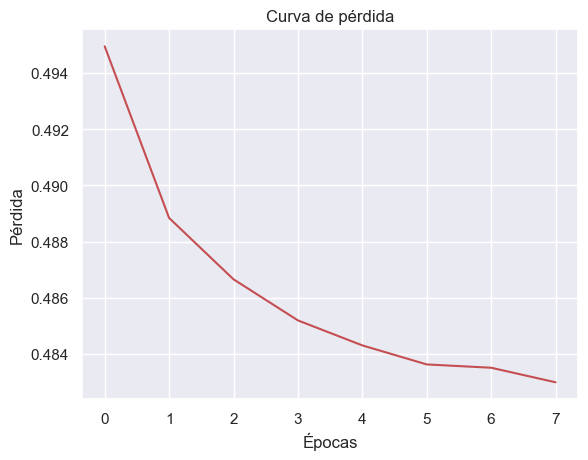

Epoch 1/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.7578 - loss: 0.5022
Epoch 2/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.7647 - loss: 0.4906
Epoch 3/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.7656 - loss: 0.4891
Epoch 4/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.7664 - loss: 0.4869
Epoch 5/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.7663 - loss: 0.4854
Epoch 6/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.7680 - loss: 0.4831
Epoch 7/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.7663 - loss: 0.4855
Epoch 8/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.7671 - loss: 0.4832
7279/7279 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7540 - loss: 0.4602
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7426 - loss: 0.4611
Training accuracy: 0.7660484313964844
Testing accuracy: 0.7458468079566956


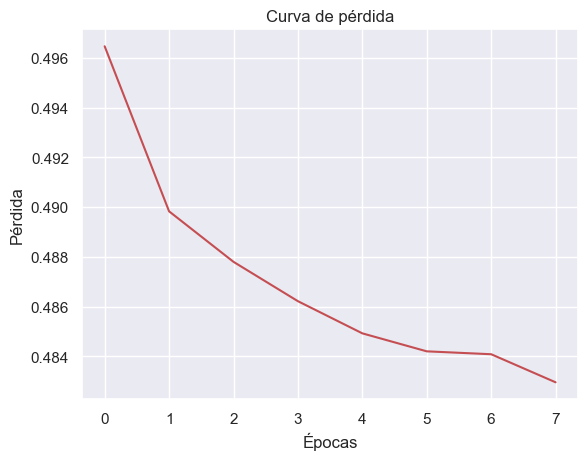

Epoch 1/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.7552 - loss: 0.5053
Epoch 2/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.7659 - loss: 0.4890
Epoch 3/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.7667 - loss: 0.4861
Epoch 4/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.7685 - loss: 0.4840
Epoch 5/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.7686 - loss: 0.4827
Epoch 6/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.7653 - loss: 0.4862
Epoch 7/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.7686 - loss: 0.4819
Epoch 8/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.7691 - loss: 0.4812
7279/7279 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7236 - loss: 0.5111
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7011 - loss: 0.5332
Training accuracy: 0.770191490650177
Testing accuracy: 0.7037347555160522


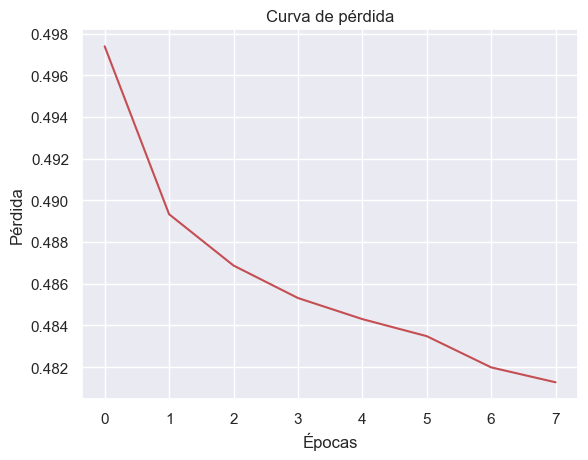

In [63]:
# Hiperparametros
hidden_units = 32     # Número de neuronas en la capa oculta
activation = 'relu'   # Función de activación para la capa oculta
learning_rate = 0.01  # Tasa de aprendizaje
epochs = 8            # Número de épocas
batch_size = 16       # Tamaño del lote
# Normalizar los datos (usar sklearn's normalize)
# create_and_train_model(0, hidden_units, epochs, batch_size, activation, learning_rate, X_train_norm, y_train, X_test_norm, y_test)
create_and_train_model(0, hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)
create_and_train_model(1, hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)
create_and_train_model(2, hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)

Epoch 1/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.7572 - loss: 0.5022
Epoch 2/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.7636 - loss: 0.4900
Epoch 3/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.7661 - loss: 0.4877
Epoch 4/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.7662 - loss: 0.4857
Epoch 5/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7670 - loss: 0.4840
Epoch 6/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.7698 - loss: 0.4814
Epoch 7/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.7662 - loss: 0.4825
Epoch 8/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7702 - loss: 0.4802
7279/7279 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7492 - loss: 0.4715
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7347 - loss: 0.4792
Training accuracy: 0.7694100737571716
Testing accuracy: 0.7376920580863953


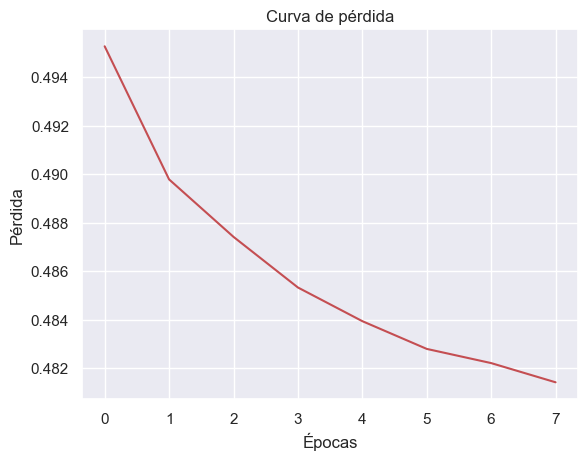

Epoch 1/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.7574 - loss: 0.5024
Epoch 2/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7655 - loss: 0.4884
Epoch 3/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7668 - loss: 0.4875
Epoch 4/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7668 - loss: 0.4846
Epoch 5/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7689 - loss: 0.4825
Epoch 6/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.7691 - loss: 0.4830
Epoch 7/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.7678 - loss: 0.4827
Epoch 8/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.7691 - loss: 0.4812
7279/7279 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7395 - loss: 0.4817
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7221 - loss: 0.4971
Training accuracy: 0.7711746692657471
Testing accuracy: 0.7252190113067627


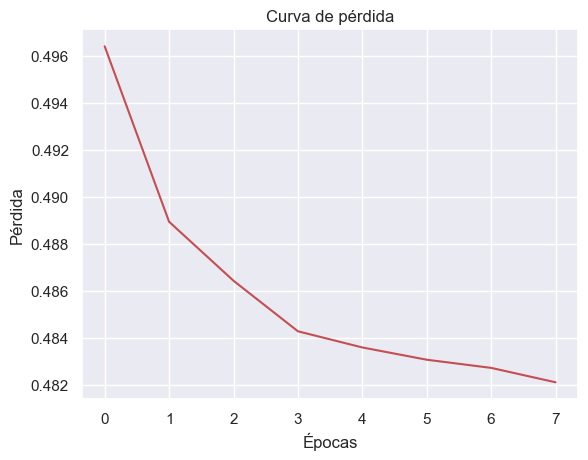

Epoch 1/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7567 - loss: 0.5048
Epoch 2/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.7639 - loss: 0.4917
Epoch 3/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.7641 - loss: 0.4905
Epoch 4/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.7656 - loss: 0.4865
Epoch 5/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.7657 - loss: 0.4864
Epoch 6/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.7662 - loss: 0.4850
Epoch 7/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.7662 - loss: 0.4843
Epoch 8/8
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.7675 - loss: 0.4849
7279/7279 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7481 - loss: 0.4790
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7374 - loss: 0.4893
Training accuracy: 0.7672162055969238
Testing accuracy: 0.7388340830802917


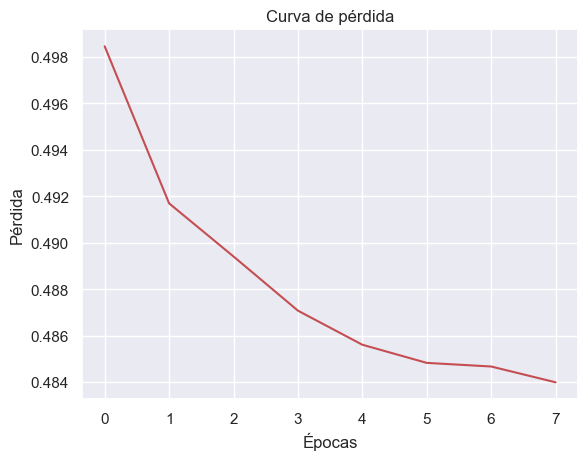

In [62]:
from tensorflow.keras.layers import LeakyReLU
# Hiperparametros
hidden_units = 32     # Número de neuronas en la capa oculta
activation = LeakyReLU(alpha=0.01)   # Función de activación para la capa oculta
learning_rate = 0.01  # Tasa de aprendizaje
epochs = 8            # Número de épocas
batch_size = 16       # Tamaño del lote
# Normalizar los datos (usar sklearn's normalize)
# create_and_train_model(0, hidden_units, epochs, batch_size, activation, learning_rate, X_train_norm, y_train, X_test_norm, y_test)
create_and_train_model(0, hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)
create_and_train_model(1, hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)
create_and_train_model(2, hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)

Epoch 1/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - accuracy: 0.7571 - loss: 0.5038
Epoch 2/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.7628 - loss: 0.4914
Epoch 3/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.7647 - loss: 0.4890
Epoch 4/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.7662 - loss: 0.4878
Epoch 5/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.7659 - loss: 0.4877
Epoch 6/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.7658 - loss: 0.4874
Epoch 7/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - accuracy: 0.7667 - loss: 0.4850
Epoch 8/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 97s 3ms/step - accuracy: 0.7673 - loss: 0.4855
7279/7279 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7273 - loss: 0.5098
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7061 - loss: 0.5269
Training accuracy: 0.7678559422492981
Testing accuracy: 0.7084099054336548


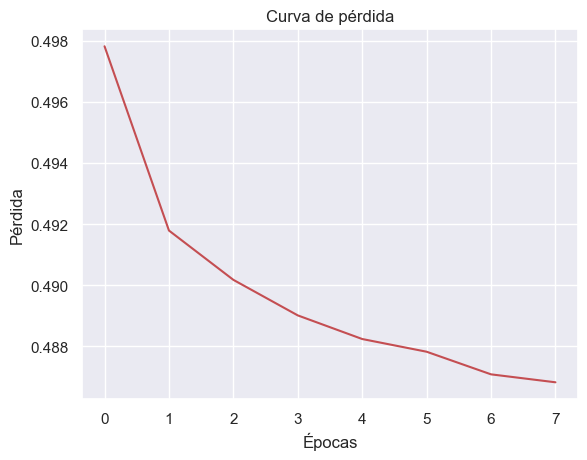

In [64]:
# Hiperparametros
hidden_units = 32     # Número de neuronas en la capa oculta
activation = 'relu'   # Función de activación para la capa oculta
learning_rate = 0.01  # Tasa de aprendizaje
epochs = 8            # Número de épocas
batch_size = 8       # Tamaño del lote
# Normalizar los datos (usar sklearn's normalize)
# create_and_train_model(0, hidden_units, epochs, batch_size, activation, learning_rate, X_train_norm, y_train, X_test_norm, y_test)
# create_and_train_model(0, hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)
create_and_train_model(1, hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)
# create_and_train_model(2, hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)

Epoch 1/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - accuracy: 0.7580 - loss: 0.5010
Epoch 2/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - accuracy: 0.7619 - loss: 0.4929
Epoch 3/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.7643 - loss: 0.4893
Epoch 4/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - accuracy: 0.7636 - loss: 0.4884
Epoch 5/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - accuracy: 0.7659 - loss: 0.4857
Epoch 6/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.7683 - loss: 0.4832
Epoch 7/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - accuracy: 0.7669 - loss: 0.4841
Epoch 8/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - accuracy: 0.7685 - loss: 0.4819
7279/7279 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7325 - loss: 0.4971
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7086 - loss: 0.5164
Training accuracy: 0.7694916725158691
Testing accuracy: 0.7124605178833008


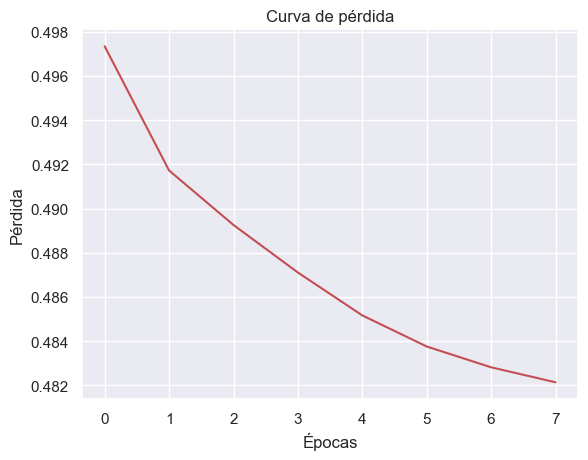

Epoch 1/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.7570 - loss: 0.5041
Epoch 2/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - accuracy: 0.7622 - loss: 0.4937
Epoch 3/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.7652 - loss: 0.4900
Epoch 4/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.7632 - loss: 0.4906
Epoch 5/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.7650 - loss: 0.4900
Epoch 6/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.7627 - loss: 0.4910
Epoch 7/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.7647 - loss: 0.4899
Epoch 8/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.7633 - loss: 0.4900
7279/7279 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7592 - loss: 0.4658
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7527 - loss: 0.4686
Training accuracy: 0.7597715854644775
Testing accuracy: 0.7555361390113831


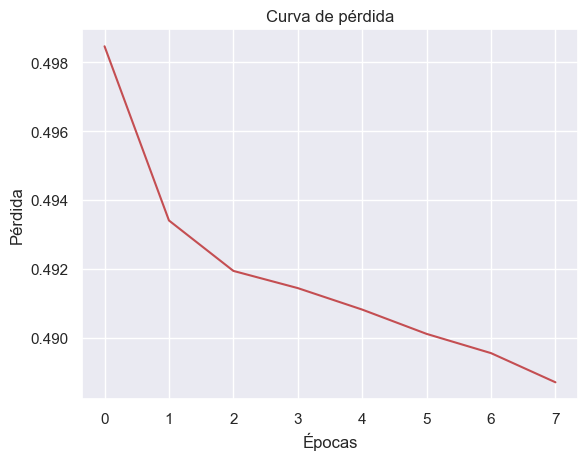

Epoch 1/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.7552 - loss: 0.5066
Epoch 2/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - accuracy: 0.7637 - loss: 0.4947
Epoch 3/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.7631 - loss: 0.4934
Epoch 4/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.7625 - loss: 0.4922
Epoch 5/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.7650 - loss: 0.4937
Epoch 6/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - accuracy: 0.7657 - loss: 0.4883
Epoch 7/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.7665 - loss: 0.4885
Epoch 8/8
29115/29115 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.7652 - loss: 0.4885
7279/7279 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7446 - loss: 0.4906
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7309 - loss: 0.4969
Training accuracy: 0.7672591209411621
Testing accuracy: 0.7337127923965454


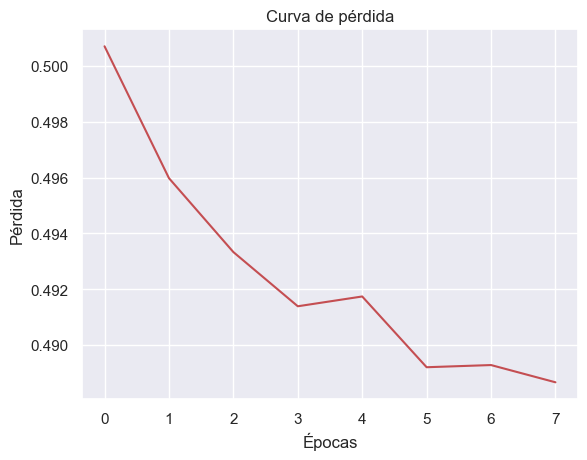

In [65]:
from tensorflow.keras.layers import LeakyReLU
# Hiperparametros
hidden_units = 32     # Número de neuronas en la capa oculta
activation = LeakyReLU(alpha=0.01)   # Función de activación para la capa oculta
learning_rate = 0.01  # Tasa de aprendizaje
epochs = 8            # Número de épocas
batch_size = 8       # Tamaño del lote
# Normalizar los datos (usar sklearn's normalize)
# create_and_train_model(0, hidden_units, epochs, batch_size, activation, learning_rate, X_train_norm, y_train, X_test_norm, y_test)
create_and_train_model(0, hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)
create_and_train_model(1, hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)
create_and_train_model(2, hidden_units, epochs, batch_size, activation, learning_rate, X_train_balanced, y_train_balanced, X_test, y_test)

Epoch 1/15
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.7563 - loss: 0.5021
Epoch 2/15
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.7617 - loss: 0.4935
Epoch 3/15
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.7601 - loss: 0.4940
Epoch 4/15
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.7627 - loss: 0.4919
Epoch 5/15
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7611 - loss: 0.4927
Epoch 6/15
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.7629 - loss: 0.4908
Epoch 7/15
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.7602 - loss: 0.4924
Epoch 8/15
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.7643 - loss: 0.4903
Epoch 9/15
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.7619 - loss: 0.4920
Epoch 10/15
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7623 - loss: 0.4916
Epoch 11/15
14558/14558 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.7619 - loss: 0.49

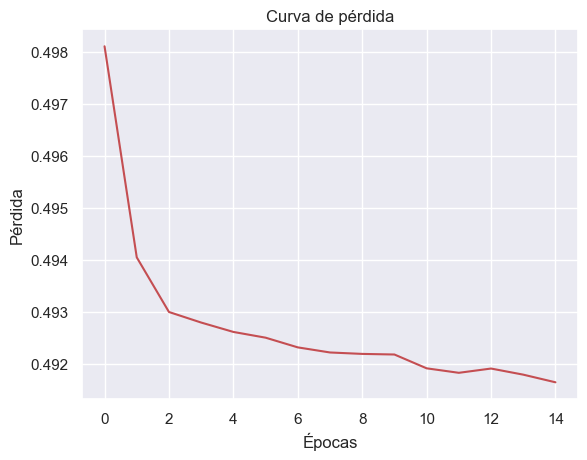

In [53]:
# Normalizar los datos (usar sklearn's normalize)
X_train_balanced = normalize(X_train_balanced)
X_test = normalize(X_test)
# ---------------------------------------------------------------------------------------------------

# Hiperparametros
hidden_units = 10     # Número de neuronas en la capa oculta
activation = 'relu'   # Función de activación para la capa oculta
learning_rate = 0.01  # Tasa de aprendizaje
epochs = 15            # Número de épocas
batch_size = 16       # Tamaño del lote
# ---------------------------------------------------------------------------------------------------

# Crear el modelo secuencial
model = models.Sequential([
    layers.Input(shape=(X_train_balanced.shape[1],)),  # Definir la entrada explícitamente
    layers.Dense(hidden_units, activation=activation),  # Capa oculta
    layers.Dense(1, activation='sigmoid')               # Capa de salida
])
# ---------------------------------------------------------------------------------------------------

# Compilar el modelo
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])
# ---------------------------------------------------------------------------------------------------

#  Entrenar el modelo
history = model.fit(X_train_balanced, y_train_balanced, epochs=epochs, batch_size=batch_size, verbose=1)

# ---------------------------------------------------------------------------------------------------

# Evaluar el modelo
train_acc = model.evaluate(X_train_balanced, y_train_balanced, batch_size=32)[1]
test_acc = model.evaluate(X_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)
# Cambiaria la medida de acurracy por F1-score que es mejor en nuestro caso dado el desbalance original

# ---------------------------------------------------------------------------------------------------

# Visualizar las pérdidas durante el entrenamiento
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.title("Curva de pérdida")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.show()

In [ ]:
# Definir la función para entrenar y evaluar
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=10):
    train_accs = []  # Lista para almacenar precisiones de entrenamiento
    test_accs = []   # Lista para almacenar precisiones de prueba
    with tqdm(total=n) as progress_bar:  # Barra de progreso para ver avances
        for _ in range(n):
            # Entrenar el modelo
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size,
                verbose=False)
            
            # Evaluar precisión en entrenamiento y prueba
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            
            # Actualizar la barra de progreso
            progress_bar.update()
    
    # Calcular promedios
    print('Average Training Accuracy: %s' % np.average(train_accs))
    print('Average Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs


# Llamar a la función con tu modelo y datos balanceados
_, __ = train_and_evaluate(model, X_train_balanced, y_train_balanced, X_test, y_test)

# Predicción final en el conjunto de prueba
predicciones = model.predict(X_test)

# Calcular la precisión final
final_accuracy = accuracy_score((predicciones > 0.5).astype(int), y_test)
print('Final Testing Accuracy: %s' % final_accuracy)


 25%|██▌       | 5/20 [22:52<1:08:38, 274.54s/it]


KeyboardInterrupt: 

### 5 Interpretacion de Resultados

<div style="text-align: justify;">
Los informes de clasificación muestran métricas que indican un rendimiento desigual entre las clases <code>False</code> y <code>True</code>, lo que refleja un problema de desbalanceo en los datos. Si bien se intentó mejorar este problema mediante el manejo interno de los modelos, queda claro que esto no fue suficiente para lograr una clasificación equilibrada para ambos casos.
Fuera de eso, los modelos se comportaron de manera aceptable, pero es difícil considerar ésto como un logro, dado que solo al clasificar todos los valores como <code>False</code> se podría alcanzar una métrica de clasificación similar.
</div>


In [ ]:
# Create a DataFrame from the dictionaries
concl = pd.DataFrame({
    'Modelo': list(roc_aucs.keys()),
    'AUC': list(roc_aucs.values()),
    'Features': [important[key] for key in roc_aucs.keys()]
})
sns.barplot(data=concl, x='Modelo', y='AUC')

plt.show()


NameError: name 'roc_aucs' is not defined

Es notable que el modelo de XGBoost, a pesar de ser el más optimizado, no logró obtener resultados mejores que el modelo de Random Forest.

In [ ]:
# Crear una lista de características únicas y contar sus apariciones
checkeo = [feature for sublist in concl['Features'] for feature in sublist]
feature_count = pd.Series(checkeo).value_counts()

# Imprimir el conteo de cada característica
print(feature_count)


1. **GenHlth (5)**:
   - Es la variable más frecuente, indicando su obvia auto-relevancia en la salud general de los individuos.

2. **HighBP (5)**:
   - Igualmente frecuente, refleja la importancia de la hipertensión en la salud y su relación con la diabetes.

3. **Age (3)**:
   - La edad es un factor clave, sugiriendo que el riesgo de esta enfermedad aumenta con el tiempo.

4. **BMI (2)**:
   - Indica que el índice de masa corporal es relevante para evaluar el riesgo de diabetes.

5. **CholCheck (2)**:
   - Los chequeos de colesterol son importantes en la evaluación de la salud cardiovascular, probablemente es su correlacion con HighBP lo que juega un factor.

6. **Income (1)**:
   - Aunque aparece solo una vez, sugiere que el nivel de ingresos puede influir en la salud, aunque es menos relevante que otras variables. Esto es sorprendente, considerando que los datos provienen del CDC, un organismo estadounidense.

7. **Education (1)**:
   - Similar a `Income`, el nivel educativo puede estar relacionado con la salud, pero no es tan determinante. Probablemente sea un caso similar al anterior

8. **HvyAlcoholConsump (1)**:
   - La frecuencia de consumo excesivo de alcohol es una preocupación, aunque aparece con menor regularidad en este contexto.

### 6 Conclusiones y Recomendaciones

Los informes de clasificación indican que los modelos de predicción enfrentan un desbalance significativo entre las clases `False` y `True`, lo que sugiere que las métricas de rendimiento no reflejan adecuadamente la capacidad del modelo para clasificar ambas clases. Aunque se realizaron intentos de ajustar los modelos para abordar este problema, los resultados muestran que estas medidas no fueron suficientes para lograr un desempeño equilibrado. Entre las variables analizadas, **GenHlth y HighBP** se destacan como las más frecuentes, subrayando su relevancia en la salud general y en la relación con la diabetes. Esto sugiere que la autoevaluación de la salud y la hipertensión son factores cruciales que deben considerarse en estudios futuros y en el desarrollo de intervenciones. 

Para mejorar la clasificación, se recomienda implementar técnicas de balanceo de clases como el sobremuestreo de la clase minoritaria (por ejemplo, SMOTE) o el submuestreo de la clase mayoritaria para equilibrar la distribución de las clases y mejorar el rendimiento del modelo. 

Adicionalmente, es importante realizar una optimización de hiperparámetros a través de técnicas como búsqueda en cuadrícula (Grid Search) o búsqueda aleatoria (Random Search) para mejorar el ajuste del modelo a los datos.
</div>




###

In [ ]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print("Distribución de clases en y_train:", dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("Distribución de clases en y_test:", dict(zip(unique, counts)))


**Balanceo el modelo**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir los datos en entrenamiento y prueba antes de aplicar SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=123)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases después de SMOTE
import numpy as np
unique, counts = np.unique(y_train_balanced, return_counts=True)
print("Distribución después de SMOTE:", dict(zip(unique, counts)))

# Normalizar las características (opcional, pero recomendado para Redes Neuronales)
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from imblearn.over_sampling import SMOTE
from tensorflow.keras import models, layers, optimizers
import matplotlib.pyplot as plt

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# ---------------------------------------------------------------------------------------------------

# Para balancear datos / Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=123)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
# ---------------------------------------------------------------------------------------------------

# Normalizar los datos (usar sklearn's normalize)
X_train_balanced = normalize(X_train_balanced)
X_test = normalize(X_test)
# ---------------------------------------------------------------------------------------------------

# Hiperparametros
hidden_units = 10     # Número de neuronas en la capa oculta
activation = 'relu'   # Función de activación para la capa oculta
learning_rate = 0.01  # Tasa de aprendizaje
epochs = 7            # Número de épocas
batch_size = 16       # Tamaño del lote
# ---------------------------------------------------------------------------------------------------

# Crear el modelo secuencial
model = models.Sequential([
    layers.Input(shape=(X_train_balanced.shape[1],)),  # Definir la entrada explícitamente
    layers.Dense(hidden_units, activation=activation),  # Capa oculta
    layers.Dense(1, activation='sigmoid')               # Capa de salida
])
# ---------------------------------------------------------------------------------------------------

# Compilar el modelo
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])
# ---------------------------------------------------------------------------------------------------

#  Entrenar el modelo
history = model.fit(X_train_balanced, y_train_balanced, epochs=epochs, batch_size=batch_size, verbose=1)

# ---------------------------------------------------------------------------------------------------

# Evaluar el modelo
train_acc = model.evaluate(X_train_balanced, y_train_balanced, batch_size=32)[1]
test_acc = model.evaluate(X_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

# ---------------------------------------------------------------------------------------------------

# Visualizar las pérdidas durante el entrenamiento
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.title("Curva de pérdida")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.show()

In [ ]:
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score

# Definir la función para entrenar y evaluar
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []  # Lista para almacenar precisiones de entrenamiento
    test_accs = []   # Lista para almacenar precisiones de prueba
    with tqdm(total=n) as progress_bar:  # Barra de progreso para ver avances
        for _ in range(n):
            # Entrenar el modelo
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size,
                verbose=False)
            
            # Evaluar precisión en entrenamiento y prueba
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            
            # Actualizar la barra de progreso
            progress_bar.update()
    
    # Calcular promedios
    print('Average Training Accuracy: %s' % np.average(train_accs))
    print('Average Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs


# Llamar a la función con tu modelo y datos balanceados
_, __ = train_and_evaluate(model, X_train_balanced, y_train_balanced, X_test, y_test)

# Predicción final en el conjunto de prueba
predicciones = model.predict(X_test)

# Calcular la precisión final
final_accuracy = accuracy_score((predicciones > 0.5).astype(int), y_test)
print('Final Testing Accuracy: %s' % final_accuracy)

